# Do Great Players Make their Teammates Better?

## Load Libraries and Data

In [1]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
start_time = time.time()

In [2]:
# load data
df_2017 = pd.read_csv("data/2017-2018 NBA Play-By-Play Data.csv", low_memory=False)
df_2018 = pd.read_csv("data/2018-2019 NBA Play-By-Play Data.csv", low_memory=False)
df_2019 = pd.read_csv("data/2019-2020 NBA Play-By-Play Data.csv", low_memory=False)

In [3]:
# concatenate data into one dataframe
df = pd.concat([df_2017, df_2018, df_2019], ignore_index=True)

## Inspect Data

In [4]:
df.head()

,Unnamed: 0,game_id,data_set,date,a1,a2,a3,a4,a5,h1,...,type,shot_distance,original_x,original_y,converted_x,converted_y,description,GameFile,Unnamed: 44,Unnamed: 45
0,0,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,...,start of period,NaN,NaN,NaN,NaN,NaN,NaN,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
1,1,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,...,jump ball,NaN,NaN,NaN,NaN,NaN,Jump Ball Felicio vs. Moreland: Tip to Markkanen,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
2,2,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,...,unknown,6.0,9.0,58.0,25.9,83.2,Nwaba 6' Driving Floating Jump Shot (2 PTS) (M...,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
3,3,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,...,unknown,NaN,NaN,NaN,NaN,NaN,Jackson Out of Bounds - Bad Pass Turnover Turn...,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN
4,4,"=""0021701224""",2017-2018 Regular Season,2018-04-11,Stanley Johnson,Anthony Tolliver,Eric Moreland,Luke Kennard,Reggie Jackson,David Nwaba,...,Jump Shot,27.0,123.0,243.0,37.3,64.7,MISS Markkanen 27' 3PT Jump Shot,[2018-04-11]-0021701224-DET@CHI.csv,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764069 entries, 0 to 1764068
Data columns (total 48 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   game_id         object 
 2   data_set        object 
 3   date            object 
 4   a1              object 
 5   a2              object 
 6   a3              object 
 7   a4              object 
 8   a5              object 
 9   h1              object 
 10  h2              object 
 11  h3              object 
 12  h4              object 
 13  h5              object 
 14  period          int64  
 15  away_score      int64  
 16  home_score      int64  
 17  remaining_time  object 
 18  elapsed         object 
 19  play_length     object 
 20  play_id         int64  
 21  team            object 
 22  event_type      object 
 23  assist          object 
 24  away            object 
 25  home            object 
 26  block           object 
 27  entered         object 
 28  left        

## Data Cleaning

In [6]:
# remove nonsensical columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 44', 'Unnamed: 45'], inplace=True)

In [7]:
# handle missing values
df.fillna({
    'points': 0,
    'assist': 'None'
}, inplace=True)

In [8]:
# convert columns to correct data types
df['remaining_time_seconds'] = pd.to_timedelta(df['remaining_time'].str.strip(), errors='coerce').dt.total_seconds()
df['elapsed'] = pd.to_numeric(df['elapsed'], errors='coerce')
df['play_length_seconds'] = pd.to_timedelta(df['play_length'].str.strip(), errors='coerce').dt.total_seconds()
df['points'] = pd.to_numeric(df['points'], errors='coerce').astype(int)
df['shot_distance'] = pd.to_numeric(df['shot_distance'], errors='coerce')
df['converted_x'] = pd.to_numeric(df['converted_x'], errors='coerce')
df['converted_y'] = pd.to_numeric(df['converted_y'], errors='coerce')

In [9]:
# remove rows where there is no value in the event_type field (1,010 instances)
df.dropna(subset=['event_type'], inplace=True)

## Identify Top Players

In [10]:
# identify top players
n=10
top_players_df = (
    df.groupby('player', as_index=False)['points']
      .sum()
      .sort_values(by='points', ascending=False).reset_index(drop=True)
).head(n)

top_players_df.index = range(1, n+1)

top_players_df

,player,points
1,James Harden,8533
2,LeBron James,6782
3,Giannis Antetokounmpo,6668
4,Damian Lillard,6639
5,Anthony Davis,6033
6,Bradley Beal,5837
7,Donovan Mitchell,5729
8,Russell Westbrook,5689
9,Paul George,5480
10,CJ McCollum,5397


In [11]:
top_players_list = top_players_df['player'].tolist()
top_players_list

['James Harden',
 'LeBron James',
 'Giannis Antetokounmpo',
 'Damian Lillard',
 'Anthony Davis',
 'Bradley Beal',
 'Donovan Mitchell',
 'Russell Westbrook',
 'Paul George',
 'CJ McCollum']

## Top Player Effects

In [12]:
# some of the top players have played for multiple teams
for top_player in top_players_list:
    teams_scored_for = df.loc[
        (df['player'] == top_player) & (df['points'] > 0), 'team'
    ].dropna().str.strip().unique()
    
    print(f"{top_player} scored for: {teams_scored_for}")

James Harden scored for: ['HOU']
LeBron James scored for: ['CLE' 'LAL']
Giannis Antetokounmpo scored for: ['MIL']
Damian Lillard scored for: ['POR']
Anthony Davis scored for: ['NOP' 'LAL']
Bradley Beal scored for: ['WAS']
Donovan Mitchell scored for: ['UTA']
Russell Westbrook scored for: ['OKC' 'HOU']
Paul George scored for: ['OKC' 'LAC']
CJ McCollum scored for: ['POR']


### On/Off Court Points Per Minute (PPM)

Calculating on/off court points per minute (PPM) can assess the impact a top player’s presence has on a team’s scoring efficiency. By comparing team scoring rates when the player is on the court versus when they are off, we can gauge whether their presence positively influences overall team performance.

On-court PPM measures how many points per minute the team scores when the top player is playing, while off-court PPM shows the scoring rate without the top player. A significant positive difference (higher scoring rate when the top player is on the court) suggests that the top player not only contributes directly but also improves teammates’ performance.

In [13]:
ppm_results = []
players_on_court = ['a1', 'a2', 'a3', 'a4', 'a5', 'h1', 'h2', 'h3', 'h4', 'h5']

for top_player in top_players_list:
    # determine what teams the player has played for
    teams_scored_for = df.loc[
        (df['player'] == top_player) & (df['points'] > 0), 'team'
    ].dropna().str.strip().unique()
    
    # create a mask for plays when the player is on the court
    mask_active = df[players_on_court].apply(lambda row: top_player in row.values, axis=1)
    
    for team in teams_scored_for:
        team_mask = df['team'].str.strip() == team
        
        # filter for plays that belong to the team
        team_active_plays = df[mask_active & team_mask]
        team_inactive_plays = df[(~mask_active) & team_mask]
        
        # calculate metrics
        active_points = team_active_plays['points'].sum()
        active_minutes = team_active_plays['play_length_seconds'].sum() / 60
        
        inactive_points = team_inactive_plays['points'].sum()
        inactive_minutes = team_inactive_plays['play_length_seconds'].sum() / 60
        
        active_ppm = active_points / active_minutes if active_minutes > 0 else np.nan
        inactive_ppm = inactive_points / inactive_minutes if inactive_minutes > 0 else np.nan
        
        # append the player's metrics to a list
        ppm_results.append({
            'player': top_player,
            'team': team,
            'active_ppm': active_ppm,
            'inactive_ppm': inactive_ppm,
            'ppm_difference': active_ppm - inactive_ppm,
            'active_minutes': active_minutes,
            'active_points': active_points,
            'inactive_minutes': inactive_minutes,
            'inactive_points': inactive_points
        })

# create a dataframe
ppm_results_df = pd.DataFrame(ppm_results)
ppm_results_df

,player,team,active_ppm,inactive_ppm,ppm_difference,active_minutes,active_points,inactive_minutes,inactive_points
0,James Harden,HOU,4.852789,4.713280,0.139509,4594.883333,22298,1910.983333,9007
1,LeBron James,CLE,4.632699,4.305898,0.326802,1985.883333,9200,4094.616667,17631
2,LeBron James,LAL,4.855970,4.618728,0.237242,2488.483333,12084,3543.400000,16366
3,Giannis Antetokounmpo,MIL,5.016517,4.673362,0.343156,3849.483333,19311,2414.750000,11285
4,Damian Lillard,POR,4.692194,4.196565,0.495630,4556.716667,21381,1912.516667,8026
5,Anthony Davis,NOP,5.041511,4.789626,0.251885,2376.866667,11983,3335.333333,15975
6,Anthony Davis,LAL,4.793584,4.690642,0.102942,1521.200000,7292,4510.683333,21158
7,Bradley Beal,WAS,4.757031,4.558689,0.198342,4061.566667,19321,1678.333333,7651
8,Donovan Mitchell,UTA,4.607500,4.504132,0.103368,4175.366667,19238,1972.633333,8885
9,Russell Westbrook,OKC,5.066966,4.549238,0.517729,2877.066667,14578,2959.616667,13464


This table shows how each top player’s team performs in terms of PPM when that player is on the court versus off the court. The active_ppm column indicates the team’s scoring rate with the top player on the court, while inactive_ppm shows the scoring rate when the top player is off the court. All top players have slightly positive ppm_difference values indicating the top player makes a positive impact on the team's offensive performance.

### On/Off Court Net Rating

On Court Net Rating is a measure of a team’s scoring margin per 100 minutes played when the top player is on the court. On the contrary, Off Court Net Rating is a measure of a team’s scoring margin per 100 minutes played when the top player is not on the court.

By comparing these two measures, we can assess whether the team’s performance improves when the top player is on the court relative to when they are off the court.

In [14]:
net_rating_results = []

for top_player in top_players_list:
    # determine what teams the player has played for
    teams_scored_for = df.loc[
        (df['player'] == top_player) & (df['points'] > 0), 'team'
    ].dropna().str.strip().unique()

    for team in teams_scored_for:
        team_mask = df['team'].str.strip() == team

        # find games the top player played in
        mask_on = df[players_on_court].apply(lambda row: top_player in row.values, axis=1)
        games_played = df.loc[mask_on & (df['team'].str.strip() == team), 'game_id'].unique()
        games_played_df = df[df['game_id'].isin(games_played)].copy()

        # make the on-court mask within these games
        on_mask = games_played_df[players_on_court].apply(lambda row: top_player in row.values, axis=1)

        # on-court calculations
        on_scoring = games_played_df.loc[on_mask & (games_played_df['team'].str.strip() == team), 'points'].sum()
        on_allowed = games_played_df.loc[on_mask & (games_played_df['team'].str.strip() != team), 'points'].sum()
        on_minutes = games_played_df.loc[on_mask, 'play_length_seconds'].sum() / 60
        on_net_margin = on_scoring - on_allowed
        on_net_rating = (on_net_margin / on_minutes) * 100 if on_minutes > 0 else np.nan

        # off-court calculations
        off_scoring = games_played_df.loc[(~on_mask) & (games_played_df['team'].str.strip() == team), 'points'].sum()
        off_allowed = games_played_df.loc[(~on_mask) & (games_played_df['team'].str.strip() != team), 'points'].sum()
        off_minutes = games_played_df.loc[~on_mask, 'play_length_seconds'].sum() / 60
        off_net_margin = off_scoring - off_allowed
        off_net_rating = (off_net_margin / off_minutes) * 100 if off_minutes > 0 else np.nan

        # append the teams's metrics to a list
        net_rating_results.append({
            'player': top_player,
            'team': team,
            'on_net_rating': on_net_rating,
            'off_net_rating': off_net_rating,
            'net_rating_diff': on_net_rating - off_net_rating,
            'on_minutes': on_minutes,
            'on_scoring': on_scoring,
            'off_minutes': off_minutes,
            'off_scoring': off_scoring
        })

# create a dataframe
net_rating_results_df = pd.DataFrame(net_rating_results)
net_rating_results_df

,player,team,on_net_rating,off_net_rating,net_rating_diff,on_minutes,on_scoring,off_minutes,off_scoring
0,James Harden,HOU,14.489743,0.097641,14.392102,9385.950000,22298,3072.483333,7032
1,LeBron James,CLE,1.319874,-4.303044,5.622919,4015.533333,9200,1092.250000,2320
2,LeBron James,LAL,14.002884,-9.290622,23.293507,5084.666667,12084,1894.383333,4375
3,Giannis Antetokounmpo,MIL,19.733960,-2.175674,21.909634,8102.783333,19311,3539.133333,8127
4,Damian Lillard,POR,9.273760,-14.961619,24.235378,8982.333333,21381,2813.866667,5808
5,Anthony Davis,NOP,7.965812,-15.086989,23.052801,5046.566667,11983,1882.416667,4230
6,Anthony Davis,LAL,12.638574,5.587152,7.051421,3069.966667,7292,1163.383333,2632
7,Bradley Beal,WAS,-2.103473,-10.097363,7.993890,8272.033333,19321,2723.483333,6059
8,Donovan Mitchell,UTA,10.086078,3.331801,6.754277,8467.116667,19238,3481.600000,7665
9,Russell Westbrook,OKC,9.794912,-6.509489,16.304401,6166.466667,14578,2058.533333,4274


In the 2017-2018 NBA season LeBron James played for the Cleveland Cavaliers on a star studded team with players, such as Kevin Love, that could help maintain a offensive performance alongside a solid defensive presence when LeBron was off the court. This means that LeBron did not have to "carry" the Cavaliers as they progressed to the NBA finals. On the other hand, Damian Lillard, who played for the Portland Trailblazers, did not have high-quality players to play well when Dame was resting on the bench. This goes to show that the top players are more effective at making their teammates better when the top players are on worse teams as the team's performance starts to break down when the top player steps off the court.

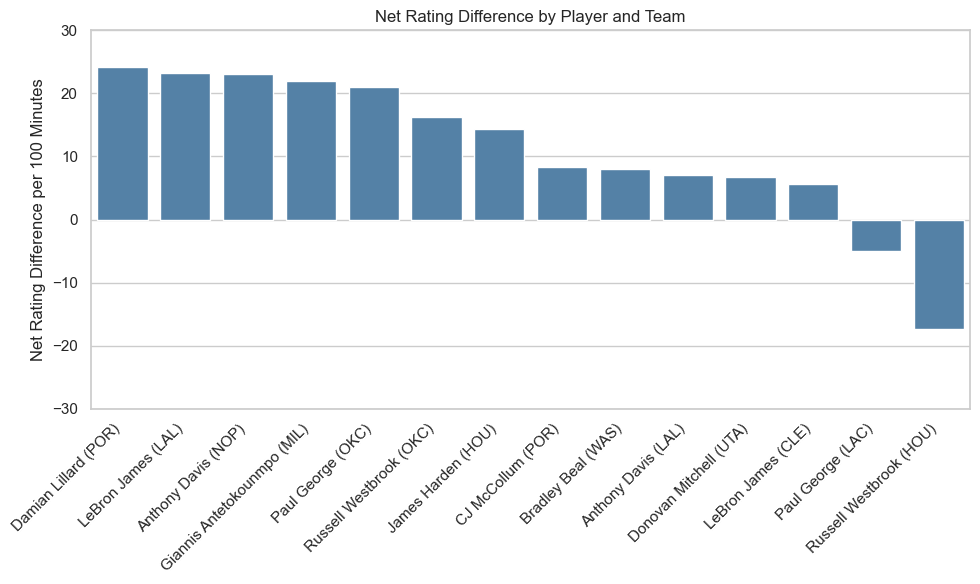

In [15]:
# combine player names with their teams
net_rating_results_df['player_team'] = net_rating_results_df['player'] + " (" + net_rating_results_df['team'] + ")"

# sort the results
net_rating_results_sorted_df = net_rating_results_df.sort_values('net_rating_diff', ascending=False)

# set style and plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=net_rating_results_sorted_df,
    x='player_team',
    y='net_rating_diff',
    color='steelblue'
)
ax.set_ylim(-30, 30)

# add labels
ax.set_title('Net Rating Difference by Player and Team')
ax.set_xlabel('')
ax.set_ylabel('Net Rating Difference per 100 Minutes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# save the figure
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)
output_path_1 = os.path.join(output_dir, "Net Rating Difference Results.png")
plt.savefig(output_path_1)

plt.show()

### Teammate Shots & Assists

Do teammates take more shots or receive more assists when a top player is on the court versus when the top player is not on the court? Essentially, are teammates generating more offensive power when a top player is on the court or not?

In [16]:
shots_and_assists_results = []

for top_player in top_players_list:
    # determine what teams the player has played for
    teams_scored_for = df.loc[
        (df['player'] == top_player) & (df['points'] > 0), 'team'
    ].dropna().str.strip().unique()

    for team in teams_scored_for:
        team_mask = df['team'].str.strip() == team
        
        # find the games when the player played for their team
        mask_on = df[players_on_court].apply(lambda row: top_player in row.values, axis=1)
        games_played = df.loc[mask_on & (df['team'].str.strip() == team), 'game_id'].unique()
        df_star_games = df[df['game_id'].isin(games_played)].copy()
        
        # within these games, calculate the on-court mask
        on_mask = df_star_games[players_on_court].apply(lambda row: top_player in row.values, axis=1)
        
        # exclude events where the star is the shooter because we want to analyze teammates data
        teammate_mask = df_star_games['player'] != top_player
        team_mask = df_star_games['team'].str.strip() == team
        
        # define shot events
        shot_events = df_star_games['event_type'].isin(['shot', 'miss'])
        
        # Define assist events (plays where the assist field is not "None")
        assist_events = df_star_games['assist'] != 'None'
        
        # on-court events for teammates when the star is on the floor
        # off-court events for teammates when the star is off the floor
        on_team_mask = on_mask & team_mask & teammate_mask
        off_team_mask = (~on_mask) & team_mask & teammate_mask
        
        # count teammate shot events
        # multiply off_shots by 0.8 to account for the fact that the star player is not on the floor
        on_shots = df_star_games.loc[on_team_mask & shot_events, 'game_id'].count()
        off_shots = df_star_games.loc[off_team_mask & shot_events, 'game_id'].count() * 0.8
        
        # count the assist events
        # multiply off_assists by 0.8 to account for the fact that the star player is not on the floor
        on_assists = df_star_games.loc[on_team_mask & assist_events, 'game_id'].count()
        off_assists = df_star_games.loc[off_team_mask & assist_events, 'game_id'].count() * 0.8
        
        # total minutes the team played with the top player on and off the floor
        on_minutes = df_star_games.loc[on_mask & team_mask, 'play_length_seconds'].sum() / 60
        off_minutes = df_star_games.loc[(~on_mask) & team_mask, 'play_length_seconds'].sum() / 60
        
        # calculate rates per 100 minutes
        on_shot_rate = (on_shots / on_minutes) * 100 if on_minutes > 0 else np.nan
        off_shot_rate = (off_shots / off_minutes) * 100 if off_minutes > 0 else np.nan
        
        on_assist_rate = (on_assists / on_minutes) * 100 if on_minutes > 0 else np.nan
        off_assist_rate = (off_assists / off_minutes) * 100 if off_minutes > 0 else np.nan
        
        shots_and_assists_results.append({
            'player': top_player,
            'team': team,
            'on_shot_rate': on_shot_rate,
            'off_shot_rate': off_shot_rate,
            'shot_rate_diff': on_shot_rate - off_shot_rate,
            'on_assist_rate': on_assist_rate,
            'off_assist_rate': off_assist_rate,
            'assist_rate_diff': on_assist_rate - off_assist_rate,
            'on_minutes': on_minutes,
            'off_minutes': off_minutes,
            'on_shots': on_shots,
            'off_shots': off_shots,
            'on_assists': on_assists,
            'off_assists': off_assists
        })

# create a dataframe
shots_and_assists_results_df = pd.DataFrame(shots_and_assists_results)
shots_and_assists_results_df

,player,team,on_shot_rate,off_shot_rate,shot_rate_diff,on_assist_rate,off_assist_rate,assist_rate_diff,on_minutes,off_minutes,on_shots,off_shots,on_assists,off_assists
0,James Harden,HOU,237.829760,305.669239,-67.839479,80.698458,73.102986,7.595472,4594.883333,1490.500000,10928,4556.0,3708,1089.6
1,LeBron James,CLE,247.950115,293.040479,-45.090364,79.410506,72.462576,6.947930,1985.883333,526.616667,4924,1543.2,1577,381.6
2,LeBron James,LAL,262.649941,297.929863,-35.279922,92.948181,82.975335,9.972846,2488.483333,941.966667,6536,2806.4,2313,781.6
3,Giannis Antetokounmpo,MIL,266.165589,293.801063,-27.635473,79.361300,82.637262,-3.275963,3849.483333,1750.300000,10246,5142.4,3055,1446.4
4,Damian Lillard,POR,264.664250,281.369282,-16.705032,75.163769,64.763591,10.400178,4556.716667,1430.433333,12060,4024.8,3425,926.4
5,Anthony Davis,NOP,283.987322,299.316777,-15.329455,81.115194,82.507320,-1.392127,2376.866667,922.100000,6750,2760.0,1928,760.8
6,Anthony Davis,LAL,270.838811,282.208659,-11.369847,78.885091,76.581973,2.303118,1521.200000,587.083333,4120,1656.8,1200,449.6
7,Bradley Beal,WAS,262.657267,298.005777,-35.348510,83.268361,87.185762,-3.917401,4061.566667,1321.316667,10668,3937.6,3382,1152.0
8,Donovan Mitchell,UTA,243.786973,283.820238,-40.033265,80.663574,81.138208,-0.474634,4175.366667,1712.633333,10179,4860.8,3368,1389.6
9,Russell Westbrook,OKC,290.956066,290.150328,0.805738,91.412550,63.837872,27.574678,2877.066667,1000.033333,8371,2901.6,2630,638.4


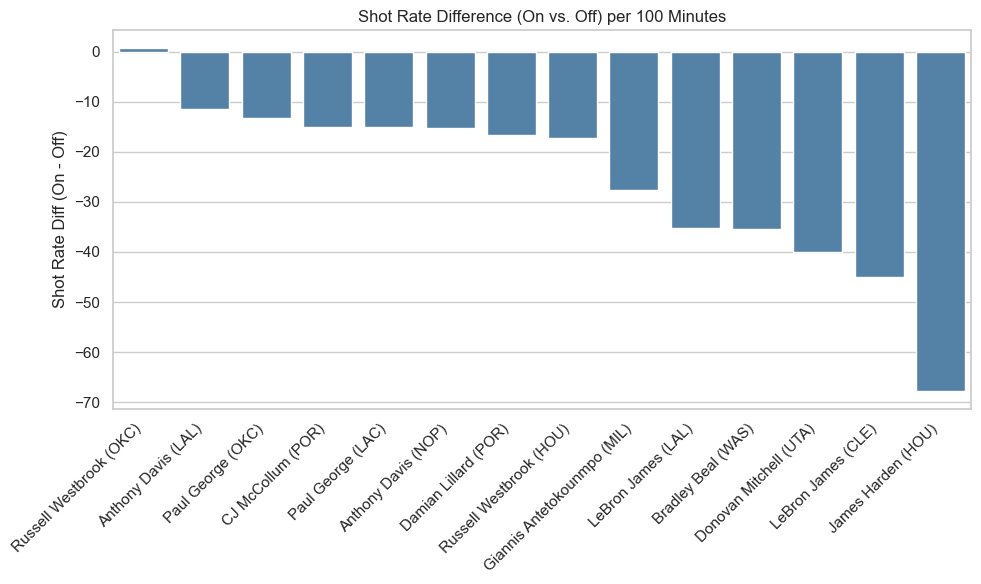

In [17]:
# combine player names with their teams
shots_and_assists_results_df['player_team'] = shots_and_assists_results_df['player'] + " (" + shots_and_assists_results_df['team'] + ")"

# sort the results
shot_rate_sorted_df = shots_and_assists_results_df.sort_values('shot_rate_diff', ascending=False)

# set style and plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(
    data=shot_rate_sorted_df,
    x='player_team',
    y='shot_rate_diff',
    color='steelblue'
)

# add labels
ax1.set_title('Shot Rate Difference (On vs. Off) per 100 Minutes')
ax1.set_xlabel('')
ax1.set_ylabel('Shot Rate Diff (On - Off)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# save the figure
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)
output_path_2 = os.path.join(output_dir, "Shot Rate Difference Results.png")
plt.savefig(output_path_2)

plt.show()

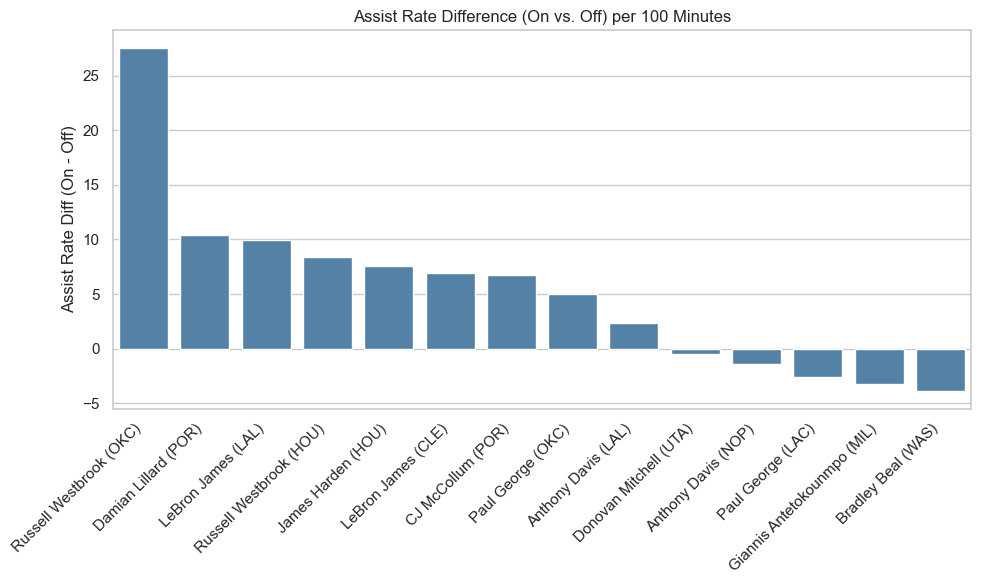

In [18]:
# sort the results
assist_rate_sorted_df = shots_and_assists_results_df.sort_values('assist_rate_diff', ascending=False)

# set style and plot
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(
    data=assist_rate_sorted_df,
    x='player_team',
    y='assist_rate_diff',
    color='steelblue'
)

# add labels
ax2.set_title('Assist Rate Difference (On vs. Off) per 100 Minutes')
ax2.set_xlabel('')
ax2.set_ylabel('Assist Rate Diff (On - Off)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# save the figure
output_path_2 = os.path.join(output_dir, "Assist Rate Difference Results.png")
plt.savefig(output_path_2)
plt.show()

In [19]:
end_time = time.time()
print("Total Notebook Execution Time: {:.2f} seconds".format(end_time - start_time))

Total Notebook Execution Time: 247.65 seconds
